## Project 1 : Global Superstore 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import random
import numpy as np
import csv

In [2]:
# Read the data from the dataset
sstore_df = pd.read_csv('C:/Users/vijet/git/Project_GlobalSuperStore/Global_Superstore_new.csv') 
sstore_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,5/2/2013,7/2/2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,5/11/2013,6/11/2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


# 1. Categorical analysis using Chi-Square
### Null Hypothesis: No statistical significance exists in the distribution of the orders placed by the three segments: corporate, consumers and home office. 

In [10]:
#Observed data for the 3 segments from the dataset.
observed_segment_data = sstore_df['Segment'].value_counts()
observed_segment_data

Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64

In [11]:
#Creating a dataframe for the observed data.
chi_square_df = pd.DataFrame([observed_segment_data]).T
chi_square_df

,Segment
Consumer,26518
Corporate,15429
Home Office,9343


In [12]:
#Adding a column whose default values are the expected values. 
chi_square_df[1] = 25000
chi_square_df

,Segment,1
Consumer,26518,25000
Corporate,15429,25000
Home Office,9343,25000


In [6]:
#Renaming the columns.
chi_square_df.columns = ["Observed", "Expected"]
chi_square_df

,Observed,Expected
Consumer,26518,25000
Corporate,15429,25000
Home Office,9343,25000


In [7]:
# The degree of freedom is 3-1 = 2
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = st.chi2.ppf(q = 0.95, df = 2)

In [8]:
# Displaying the critical value.
critical_value

5.991464547107979

In [9]:
# Run the chi square test with stats.chisquare()
st.chisquare(chi_square_df['Observed'], chi_square_df['Expected'])

Power_divergenceResult(statistic=13562.00056, pvalue=0.0)

### Conclusion : Since the chi-square value at a confidence level of 95% exceeds the critical value of 5.99, we conclude that the differences seen in the number of orders per segment are statistically significant.

# 2. Correlation between Profits and other factors such as Discounts, Sales, Quantity and Shipping cost across Regions

In [15]:
#Extracting the series of Discounts on orders and the corresponding Profit/Loss.
discounts = sstore_df['Discount']
profits = sstore_df['Profit']

The correlation between the factors, discounts and profits is -0.32


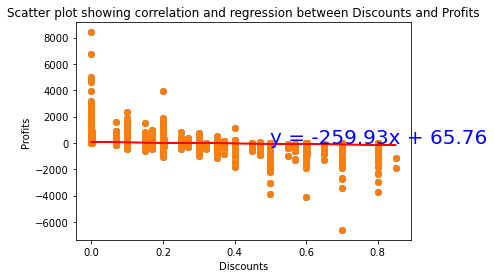

In [27]:
#Calculation of correlation between discounts and profits.
from scipy.stats import linregress
correlation = st.pearsonr(discounts,profits)
plt.scatter(discounts,profits)
plt.title('Scatter plot showing correlation and regression between Discounts and Profits')
plt.xlabel('Discounts')
plt.ylabel('Profits')
(slope, intercept, rvalue, pvalue, stderr) = linregress(discounts, profits)
regress_values = discounts * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(discounts, profits)
plt.plot(discounts,regress_values,"r-")
plt.annotate(line_eq,(0.5,10),fontsize=20,color='blue')
print(f'The correlation between the factors, discounts and profits is {round(correlation[0],2)}')

In [19]:
#Extracting the series of Sales and the corresponding Profit/Loss.
sales = sstore_df['Sales']
profits = sstore_df['Profit']

The correlation between the factors, sales and profits is 0.48


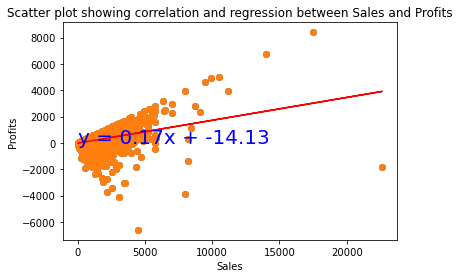

In [21]:
#Calculation of correlation between sales and profits.
from scipy.stats import linregress
correlation = st.pearsonr(sales,profits)
plt.scatter(sales,profits)
plt.title('Scatter plot showing correlation and regression between Sales and Profits')
plt.xlabel('Sales')
plt.ylabel('Profits')
(slope, intercept, rvalue, pvalue, stderr) = linregress(sales, profits)
regress_values = sales * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(sales, profits)
plt.plot(sales,regress_values,"r-")
plt.annotate(line_eq,(0.5,10),fontsize=20,color='blue')
print(f'The correlation between the factors, sales and profits is {round(correlation[0],2)}')

In [22]:
#Extracting the series of Quantity and the corresponding Profit/Loss.
quantity = sstore_df['Quantity']
profits = sstore_df['Profit']

The correlation between the factors, quantity and profits is 0.1


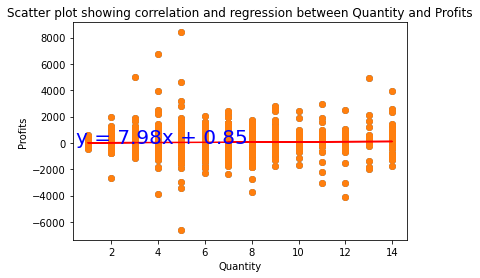

In [23]:
#Calculation of correlation between sales and profits.
from scipy.stats import linregress
correlation = st.pearsonr(quantity,profits)
plt.scatter(quantity,profits)
plt.title('Scatter plot showing correlation and regression between Quantity and Profits')
plt.xlabel('Quantity')
plt.ylabel('Profits')
(slope, intercept, rvalue, pvalue, stderr) = linregress(quantity, profits)
regress_values = quantity * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(quantity, profits)
plt.plot(quantity,regress_values,"r-")
plt.annotate(line_eq,(0.5,10),fontsize=20,color='blue')
print(f'The correlation between the factors, quantity and profits is {round(correlation[0],2)}')

In [25]:
#Extracting the series of Shipping cost and the corresponding Profit/Loss.
shipping = sstore_df['Shipping Cost']
profits = sstore_df['Profit']

The correlation between the factors, shipping and profits is 0.35


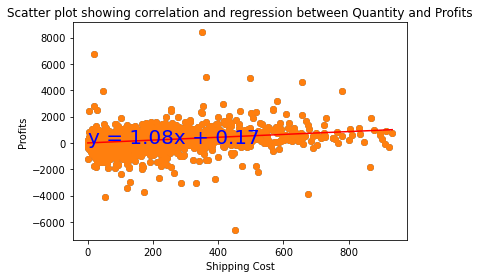

In [26]:
#Calculation of correlation between sales and profits.
from scipy.stats import linregress
correlation = st.pearsonr(shipping,profits)
plt.scatter(shipping,profits)
plt.title('Scatter plot showing correlation and regression between Quantity and Profits')
plt.xlabel('Shipping Cost')
plt.ylabel('Profits')
(slope, intercept, rvalue, pvalue, stderr) = linregress(shipping, profits)
regress_values = shipping * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(shipping, profits)
plt.plot(shipping,regress_values,"r-")
plt.annotate(line_eq,(0.5,10),fontsize=20,color='blue')
print(f'The correlation between the factors, shipping and profits is {round(correlation[0],2)}')

### Conclusion: 
* The correlation coefficient between profits and discounts is -0.32.
* The correlation coefficient between profits and sales is 0.48.
* The correlation coefficient between profits and quantity is 0.1.
* The correlation coefficient between profits and shipping cost is 0.35.
    The correlation coefficient of -1 indicates perfect negative correlation, 1 indicates perfect positive correlation, nd 0 indicates no correltion. The results indicate that there is no significant relation between profits and discounts, quantity and shipping cost. There is slight positive correlation between sales and the profits.

# 3. Need to add analysis for years

In [14]:
sstore_df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [32]:
#Sales per country
group_region = sstore_df.groupby(['Country'])
sales = group_region['Sales'].sum()

In [34]:
#Filtering top 5 countries
filtered_df = sorted_df.iloc[0:5,:]
filtered_df.reset_index()

,index,Country,Sales
0,United States,9994,2.297201e+06
1,Australia,2837,9.252359e+05
2,France,2827,8.589311e+05
3,China,1880,7.005620e+05
4,Germany,2065,6.288400e+05


Text(17.200000000000003, 0.5, 'Total Sales')

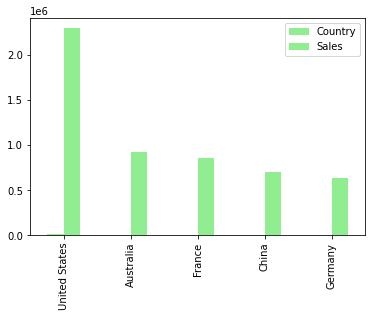

In [35]:
#Bar plot for top 5 sales vs. Country
sales_chart = filtered_df.plot(kind='bar', color = 'lightgreen')
volume_chart.set_xlabel("Country")
volume_chart.set_ylabel("Total Sales")

In [18]:
## Binning data for analyzing volume of sales as low, medium and high

bins = [0,5,10,15]
labels = ['Low','Medium','High']
sstore_df['Sales Volume Summary']=pd.cut(sstore_df['Quantity'], bins, labels=labels, include_lowest = True)
sstore_df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Sales Volume Summary
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,Medium
1,26341,IN-2013-77878,5/2/2013,7/2/2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,Medium
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,Low
4,47221,SG-2013-4320,5/11/2013,6/11/2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,19-06-2014,19-06-2014,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.01,Medium,Low
51286,35398,US-2014-102288,20-06-2014,24-06-2014,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.01,Medium,Low
51287,40470,US-2013-155768,2/12/2013,2/12/2013,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.01,High,Low
51288,9596,MX-2012-140767,18-02-2012,22-02-2012,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.00,Medium,Low


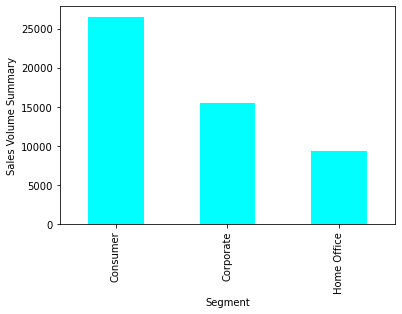

<Figure size 432x288 with 0 Axes>

In [39]:
#Sales volume summary and Segment and Category
#consumer_df = sstore_df.loc[sstore_df['Segment']=='Consumer',:]
segment_group= sstore_df.groupby(['Segment'])
total_volume = segment_group['Sales Volume Summary'].count()
volume_chart = total_volume.plot(kind='bar', color = 'cyan')
volume_chart.set_xlabel("Segment")
volume_chart.set_ylabel("Sales Volume Summary")


plt.show()
plt.tight_layout()


In [52]:
# ##Binning profits data for analyzing Profits in different regions
# binsprofit = [0,1000,2000,3000,4000,5000]
# labels = ['Range1', 'Range2', 'Range3', 'Range4', 'Range5']
# sstore_df['Profits Summary']=pd.cut(sstore_df['Profit'], binsprofit, labels=labels, include_lowest = True)
# sstore_df


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Sales Volume Summary,Profits Summary,Losses Summary
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,Medium,Range1,NaN
1,26341,IN-2013-77878,5/2/2013,7/2/2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,Medium,NaN,Range7
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,Medium,Range1,NaN
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,Low,NaN,Range7
4,47221,SG-2013-4320,5/11/2013,6/11/2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,Medium,Range1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,19-06-2014,19-06-2014,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.01,Medium,Low,Range1,NaN
51286,35398,US-2014-102288,20-06-2014,24-06-2014,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.01,Medium,Low,NaN,Range7
51287,40470,US-2013-155768,2/12/2013,2/12/2013,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.01,High,Low,Range1,NaN
51288,9596,MX-2012-140767,18-02-2012,22-02-2012,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.00,Medium,Low,Range1,NaN


In [53]:
sstore_df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority', 'Sales Volume Summary',
       'Profits Summary', 'Losses Summary'],
      dtype='object')

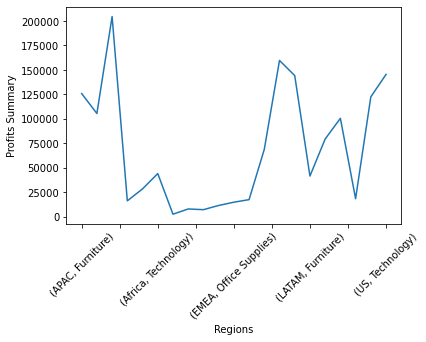

<Figure size 432x288 with 0 Axes>

In [70]:
profits_df = sstore_df.loc[sstore_df['Profit']>0,:]
total_profits_group = profits_df.groupby(['Market', 'Category'])
profit_count = profit_group['Profit'].sum()
profit_count = profit_count.plot(kind='line')

# Set the xlabel and ylabel using class methods
profit_count.set_xlabel("Regions")
profit_count.set_ylabel("Profits Summary")
plt.xticks(rotation=45)
plt.show()
plt.tight_layout()




# profit_group = sstore_df.groupby(['Market', 'Category'])

# # Count how many times each maker appears in our group
# profit_count = profit_group['Profit'].sum()

# # Create a bar chart based off of the group series from before
# profit_count = profit_count.plot(kind='line')

# # Set the xlabel and ylabel using class methods
# profit_count.set_xlabel("Regions")
# profit_count.set_ylabel("Profits Summary")
# plt.xticks(rotation=45)
# plt.show()
# plt.tight_layout()

In [71]:
# ##Binning losses data for analyzing Profits in different regions
# binsprofit = [-7000, -6000, -5000, -4000,-3000,-2000,-1000,0]
# labels = ['Range1', 'Range2', 'Range3', 'Range4', 'Range5', 'Range6', 'Range7']
# sstore_df['Losses Summary']=pd.cut(sstore_df['Profit'], binsprofit, labels=labels, include_lowest = True)
# sstore_df

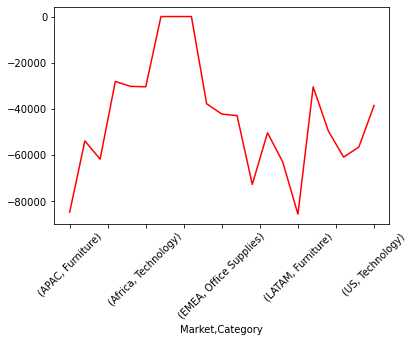

<Figure size 432x288 with 0 Axes>

In [72]:
loss_df = sstore_df.loc[sstore_df['Profit']<=0,:]
loss_group = loss_df.groupby(['Market', 'Category'])
loss_count = loss_group['Profit'].sum()
loss_count = loss_count.plot(kind='line', color = 'red')

# Set the xlabel and ylabel using class methods
profit_count.set_xlabel("Regions")
profit_count.set_ylabel("Losses Summary")
plt.xticks(rotation=45)
plt.show()
plt.tight_layout()



# loss_group = sstore_df.groupby('Region')

# # Count how many times each maker appears in our group
# loss_count = loss_group['Losses Summary'].count()


# # Create a bar chart based off of the group series from before
# loss_count = loss_count.plot(kind='line', color = 'red')

# # Set the xlabel and ylabel using class methods
# profit_count.set_xlabel("Regions")
# profit_count.set_ylabel("Losses Summary")


# plt.show()
# plt.tight_layout()